# This notebook gives the overview of plotting libraries:


1.   **Matplotlib**
2.   **Seaborn**
3.   **Plotly**



In [0]:
# import the required dependencies
import matplotlib as plt
import seaborn as sns
%matplotlib inline
sns.set()
import pandas as pd


In [3]:
# First get the datast using pandas
df = pd.read_csv('video_games_sales.csv')
print(df.shape)

(16719, 16)


In [4]:
# Let's preprocess the data
df = df.dropna()
print(df.shape)

(6825, 16)


In [5]:
# Checkout the our data
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [6]:
# Info about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [0]:
# Let's change datatypes of  some of the features.
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')
df['User_Score'] = df['User_Score'].astype('float64')

In [8]:
# Columns which are meaning full to us
usefull_columns = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']
df[usefull_columns].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


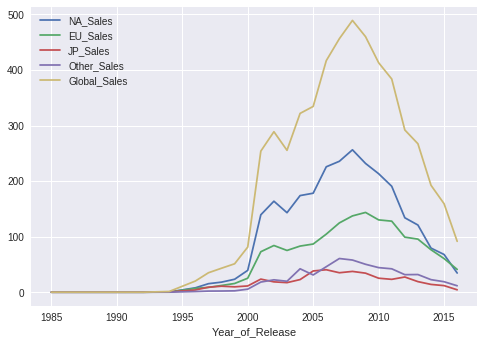

In [9]:
# Before going to plotting libs we will see the pandas own plot()
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot()

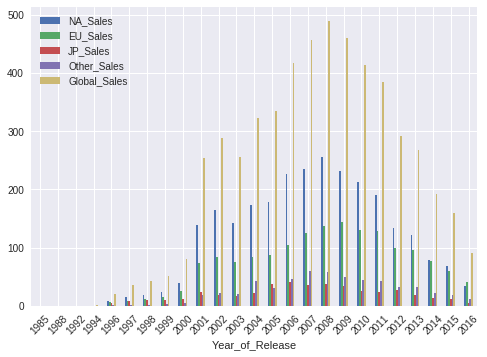

In [10]:
# There is "kind" parameter to change the type of plot
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

**Using Seaborn for our visualizations**


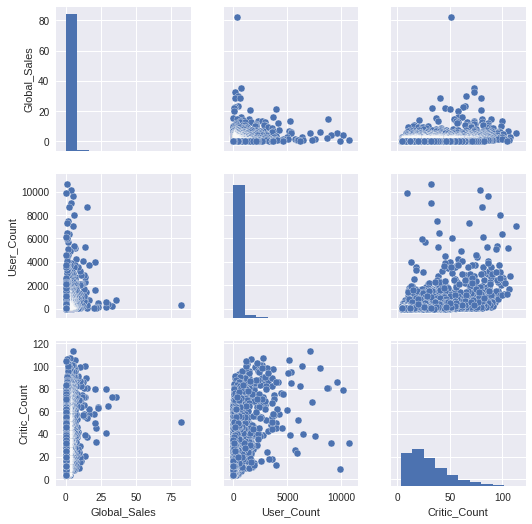

In [12]:
# Pairplot using sns
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'User_Count', 'Critic_Count']])

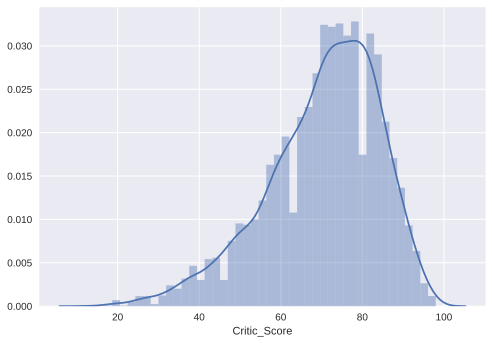

In [15]:
# Lets plot a distplot
%config InlineBackend.figure_format = 'svg'
sns.distplot(df['Critic_Score'])


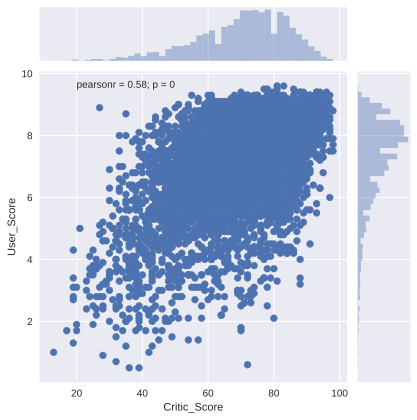

In [21]:
# jointplot() to visualize the relationship b/w to numerical variables.
sns.jointplot(x='Critic_Score', y='User_Score', data=df, kind='scatter')

**HeatMap** It allows to view the distribution of numerical variable over two categorical ones

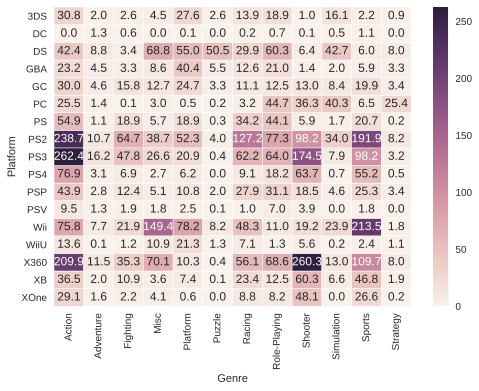

In [26]:
# Let's visualize total sales of video game by genre and platform
platform_genre_sales = df.pivot_table(
                                     index = 'Platform',
                                     columns = 'Genre',
                                     values = 'Global_Sales',
                                     aggfunc = sum).fillna(0).applymap(float)

sns.heatmap(platform_genre_sales,annot=True,fmt='.1f',linewidths = .5)